In [3]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pandas as pd
from IPython.display import display, HTML

# Utilizarás los siguientes archivos:

1.   alarm.bif  
2.   dic_alarm.csv

- El archivo .bif es un archivo tipo **"Bayesian Interchange Format"**, el cual es un formato estándar basado en texto para almacenar y compartir Redes Bayesianas. En este archivo viene ya la red Bayesiana.
- el .csv trae información de cada variable con los siguientes campos: nombre, descripción, clase ('Evidencia', 'Alarma', 'Variable Inferida')

In [4]:
# Cargamos la Red Bayesiana
bn = gum.loadBN("alarm.bif") 


In [5]:
# Vemos las variables y su descripción
variables = pd.read_csv('dic_alarm.csv',
                        usecols = ['id','nombre','descripcion','categorias','clase'],
                        index_col = ['id'])
variables

,nombre,descripcion,clase,categorias
id,,,,
1,CVP,central venous pressure,Evidencia,"LOW , NORMAL , HIGH"
2,PCWP,pulmonary capillary wedge pressure,Evidencia,"LOW , NORMAL , HIGH"
3,HISTORY,history,Evidencia,"TRUE , FALSE"
4,TPR,total peripheral resistance,Evidencia,"LOW , NORMAL , HIGH"
5,BP,blood pressure,Evidencia,"LOW , NORMAL , HIGH"
6,CO,cardiac output,Evidencia,"LOW , NORMAL , HIGH"
7,HRBP,heart rate / blood pressure,Evidencia,"LOW , NORMAL , HIGH"
8,HREKG,heart rate measured by an EKG monitor,Evidencia,"LOW , NORMAL , HIGH"
9,HRSAT,heart rate / oxygen saturation,Evidencia,"LOW , NORMAL , HIGH"


# Exploración de la Red Bayesiana

#### 1. ¿Cuántas variables y dependencias entre variables hay en la red?

In [6]:
len(variables), bn.size

(37,
 <bound method BayesNet.size of (pyAgrum.BayesNet<double>@0x5ed787e46240) BN{nodes: 37, arcs: 46, domainSize: 10^16.2389, dim: 752}>)

#### 2. Muestra la estructura de la Red Bayesiana

In [11]:
bn

(pyAgrum.BayesNet<double>@0x5e6f7d83f220) BN{nodes: 37, arcs: 46, domainSize: 10^16.2389, dim: 752}

#### 3. ¿Cuáles son las variables clasificadas como "Alarma"?

In [7]:
variables.nombre[variables.clase=='Alarma']

id
17     HYPOVOLEMIA
18       LVFAILURE
19    ANAPHYLAXIS 
20    INSUFFANESTH
21     PULMEMBOLUS
22      INTUBATION
23      KINKEDTUBE
24      DISCONNECT
Name: nombre, dtype: object

#### 4. ¿Cuál es la probabilidad de tener insuficiencia ventricular izquierda (LVFAILURE)?

In [8]:
ie = gum.LazyPropagation(bn)
ie.makeInference()


In [10]:
import pyAgrum as gum

bn = gum.loadBN("alarm.bif")
ie = gum.LazyPropagation(bn)
ie.makeInference()
lv = bn.variable("LVFAILURE")
# lv.labels() te muestra el orden de los estados, normalmente ["FALSE", "TRUE"]
post = ie.posterior("LVFAILURE")
print("Estados:", lv.labels())
print("Distribución posterior:", post)


Estados: ('TRUE', 'FALSE')
Distribución posterior: 
  LVFAILURE        |
TRUE     |FALSE    |
---------|---------|
 0.0500  | 0.9500  |



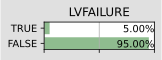

In [11]:
# Versión que usa el modelo ya ajustado.
gnb.showPosterior(bn,evs={},target='LVFAILURE')

#### 5. La presión de enclavamiento capilar pulmonar (PCWP), también conocida como presión de cuña pulmonar, es una medición hemodinámica que estima la presión en la aurícula izquierda y la presión diastólica final del ventrículo izquierdo.

#### Considerando el siguiente cuadro clínico:
- presión venosa central baja (CVP = LOW) y
- presión de enclavamiento capilar pulmonar baja (PCWP = LOW),

#### ¿Cuál es la probabilidad de tener insuficiencia ventricular izquierda (LVFAILURE)?

In [12]:
import pyAgrum as gum

# Carga la red bayesiana desde el archivo .bif
bn = gum.loadBN("alarm.bif")

# Instancia el motor de inferencia
ie = gum.LazyPropagation(bn)

# ---- ESTABLECE LA EVIDENCIA ----
ie.setEvidence({"PCWP": "LOW", "CVP": "LOW"})
ie.makeInference()

# Obtén la distribución posterior de LVFAILURE
post = ie.posterior("LVFAILURE")


In [13]:
post

(pyAgrum.Potential<double>@0x5ed787a2c080) 
  LVFAILURE        |
TRUE     |FALSE    |
---------|---------|
 0.5419  | 0.4581  |

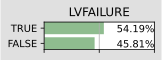

In [14]:
# Versión que usa el modelo ya ajustado.
gnb.showPosterior(bn,evs={"CVP": "LOW", "PCWP":"LOW"},target='LVFAILURE')

#### 6. ¿Te hace sentido el resultado anterior? Justifica tu respuesta.

Pareciera que no está aprotando información nueva, pues la probabilidad de LVFAILURE es casi un volado apesar de que se sabe que son buenos estimadores. 

In [37]:
# ---- ESTABLECE LA EVIDENCIA ----
ie.setEvidence({"PCWP": "HIGH", "CVP": "HIGH"})
ie.makeInference()

# Obtén la distribución posterior de LVFAILURE
post = ie.posterior("LVFAILURE")
post

(pyAgrum.Potential<double>@0x5e6f7d8d9d00) 
  LVFAILURE        |
TRUE     |FALSE    |
---------|---------|
 0.0024  | 0.9976  |

#### 7. ¿Cuál es la probabilidad de tener hipovolemia (HYPOVOLEMIA)?
Nota:  La hipovolemia es una afección en la que hay una disminución del volumen de sangre circulante en el cuerpo

In [50]:

# Carga la red bayesiana desde el archivo .bif
bn = gum.loadBN("alarm.bif")

# Instancia el motor de inferencia
ie = gum.LazyPropagation(bn)

# ---- ESTABLECE LA EVIDENCIA ----
#ie.setEvidence({"PCWP": "LOW", "CVP": "LOW"})
ie.makeInference()

# Obtén la distribución posterior de LVFAILURE
post = ie.posterior("HYPOVOLEMIA")
# Muestra las probabilidades para cada estado de HYPOVOLEMIA
print("P(HYPOVOLEMIA | PCWP=LOW, CVP=LOW):")
post

P(HYPOVOLEMIA | PCWP=LOW, CVP=LOW):


(pyAgrum.Potential<double>@0x5e6f7d917eb0) 
  HYPOVOLEMIA      |
TRUE     |FALSE    |
---------|---------|
 0.2000  | 0.8000  |

#### 8. Considerando el siguiente cuadro clínico:
- presión venosa central alta (CVP = HIGH)
- presión de enclavamiento capilar pulmonar alta (PCWP = HIGH),
- presión arterial baja (BP=LOW)
- 'output cardiaco' bajo (CO=LOW)

#### ¿Cuál es la prababilidad de padecer hipovolemia?

In [41]:
import pyAgrum as gum

# Cargar la red bayesiana
bn = gum.loadBN("alarm.bif")

# Instanciar el motor de inferencia
ie = gum.LazyPropagation(bn)

# Establecer la evidencia (nombres exactos, verifica labels si es necesario)
evidencia = {
    "CVP": "HIGH",
    "PCWP": "HIGH",
    "BP": "LOW",
    "CO": "LOW"
}
ie.setEvidence({k: v for k, v in evidencia.items()})
ie.makeInference()

# Probabilidad posterior de HYPOVOLEMIA
post = ie.posterior("HYPOVOLEMIA")
labels = bn.variable("HYPOVOLEMIA").labels()

print("P(HYPOVOLEMIA | CVP=HIGH, PCWP=HIGH, BP=LOW, CO=LOW):")
for i, estado in enumerate(labels):
    print(f"  {estado}: {post[i]:.4f}")

# Si quieres el valor exacto de, por ejemplo, 'TRUE' (cuidado con espacios):
if "TRUE" in labels:
    print("Probabilidad de hipovolemia (TRUE):", post[labels.index("TRUE")])
else:
    print("Labels para HYPOVOLEMIA:", labels)


P(HYPOVOLEMIA | CVP=HIGH, PCWP=HIGH, BP=LOW, CO=LOW):
  TRUE: 0.9632
  FALSE: 0.0368
Probabilidad de hipovolemia (TRUE): 0.963159074799072


#### 9. ¿Cómo interpretas el primer valor de 0.98 de la siguiente tabla? (ejecuta el código para mostrar la tabla)

In [42]:
## bn es la red bayesiana que guardamos al ejecutar:  bn = gum.loadBN("alarm.bif") 
bn.cpt(bn.idFromName('BP'))

(pyAgrum.Potential<double>@0x5e6f7da5a7b0) 
             ||  BP                         |
CO    |TPR   ||LOW      |NORMAL   |HIGH     |
------|------||---------|---------|---------|
LOW   |LOW   || 0.9800  | 0.0100  | 0.0100  |
NORMAL|LOW   || 0.9800  | 0.0100  | 0.0100  |
HIGH  |LOW   || 0.9000  | 0.0900  | 0.0100  |
LOW   |NORMAL|| 0.9800  | 0.0100  | 0.0100  |
NORMAL|NORMAL|| 0.1000  | 0.8500  | 0.0500  |
HIGH  |NORMAL|| 0.0500  | 0.2000  | 0.7500  |
LOW   |HIGH  || 0.3000  | 0.6000  | 0.1000  |
NORMAL|HIGH  || 0.0500  | 0.4000  | 0.5500  |
HIGH  |HIGH  || 0.0100  | 0.0900  | 0.9000  |

### Factores que determinan la presión arterial

La **presión arterial** depende principalmente de dos factores:

- **Gasto cardíaco (_Cardiac Output_)**:  
  La cantidad de sangre bombeada por el corazón cada minuto.

- **Resistencia vascular periférica**:  
  Grado de contracción o relajación de los vasos sanguíneos.

#### Relación fundamental

$$
\text{Presión arterial} = \text{Gasto cardíaco} \times \text{Resistencia vascular periférica}
$$

#### Explicación

- Si el **gasto cardíaco aumenta** (por ejemplo, cuando el corazón late más rápido o bombea más fuerte), la presión arterial tiende a aumentar, suponiendo que la resistencia vascular no cambie.
- Si la **resistencia vascular periférica aumenta** (vasos sanguíneos más contraídos), también se eleva la presión arterial, aunque el gasto cardíaco permanezca igual.
